In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

買入買權

In [12]:
def BC(K,Premium):
    s_high = int(1.25*K)
    s_low = int(0.75*K)
    
    p = []
    result = []
    
    for s in range(s_low,s_high):
        NP =max(0,s-K)-Premium
        result.append(NP)
        p.append(s)
        
    p=pd.DataFrame(p)
    result =pd.DataFrame(result)
    df = pd.merge(p,result,left_index=True,right_index=True,how='inner')
    df.rename(columns={'0_x':'Price','0_y':'Profit'},inplace=True)
    df.set_index(df['Price'],inplace=True)
    df.drop('Price',axis=1,inplace=True)
    return df 

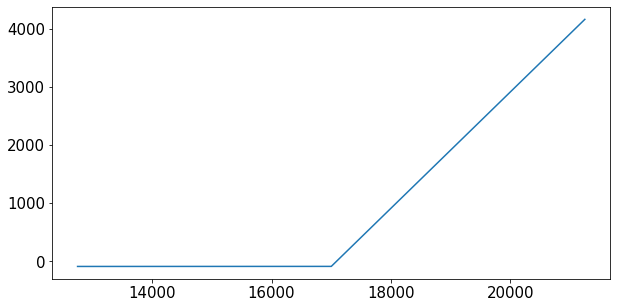

In [13]:
a = BC(K=17000,Premium=87)

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(a)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [21]:
a.loc[17080:17100]

,Profit
Price,
17080,-7
17081,-6
17082,-5
17083,-4
17084,-3
17085,-2
17086,-1
17087,0
17088,1


賣出買權

In [25]:
def SC(K,Premium):
    s_high = int(1.25*K)
    s_low  = int(0.75*K)
    
    p = []
    result = []
    
    for s in range(s_low,s_high):
        NP = min(0,K-s)+Premium
        #NP =max(0,s-K)-Premium
        result.append(NP)
        p.append(s)
        
    p=pd.DataFrame(p)
    result =pd.DataFrame(result)
    df = pd.merge(p,result,left_index=True,right_index=True,how='inner')
    df.rename(columns={'0_x':'Price','0_y':'Profit'},inplace=True)
    df.set_index(df['Price'],inplace=True)
    df.drop('Price',axis=1,inplace=True)
    return df    

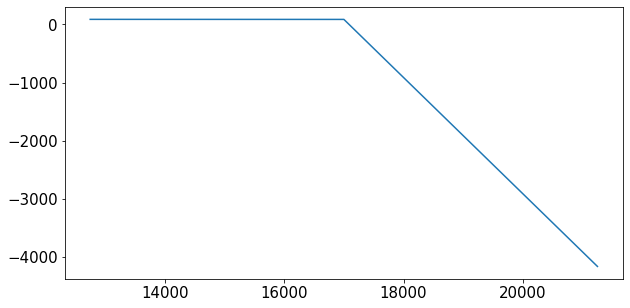

In [26]:
a = SC(K=17000,Premium=87)

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(a)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

多投價差

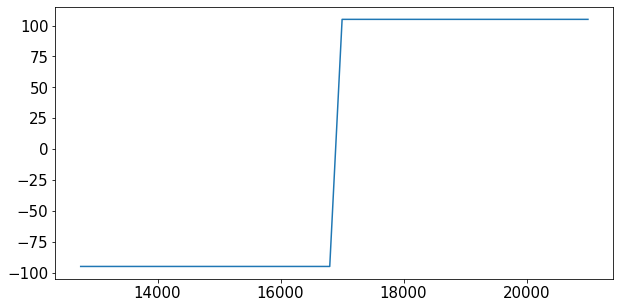

In [28]:
C = BC(K=16800,Premium=182) +SC(K=17000,Premium=87)

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(C)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [29]:
C.loc[16800:17000]

,Profit
Price,
16800,-95.0
16801,-94.0
16802,-93.0
16803,-92.0
16804,-91.0
...,...
16996,101.0
16997,102.0
16998,103.0
